# PRÁCTICA 3 - Clasificación

### SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder


In [2]:
def plot_points(ax, x, y, scatter_params):
    ax.scatter(x, y, **scatter_params)

### DATASET

In [3]:
pen = pd.read_csv("penguins.csv")
df_pen = pen[["species","bill_length_mm","bill_depth_mm"]]

In [11]:
print('Descripción del dataset:')
print(df_pen.groupby('species').describe())

print('Cantidad de Pingüinos por Especie:')
print(df_pen.groupby('species').size())

Descripción del dataset:
          bill_length_mm                                                    \
                   count       mean       std   min     25%    50%     75%   
species                                                                      
Adelie             146.0  38.823973  2.662597  32.1  36.725  38.85  40.775   
Chinstrap           68.0  48.833824  3.339256  40.9  46.350  49.55  51.075   
Gentoo             119.0  47.568067  3.106116  40.9  45.350  47.40  49.600   

                bill_depth_mm                                                 \
            max         count       mean       std   min   25%    50%    75%   
species                                                                        
Adelie     46.0         146.0  18.347260  1.219338  15.5  17.5  18.40  19.00   
Chinstrap  58.0          68.0  18.420588  1.135395  16.4  17.5  18.45  19.40   
Gentoo     59.6         119.0  14.996639  0.985998  13.1  14.2  15.00  15.75   

                 
       

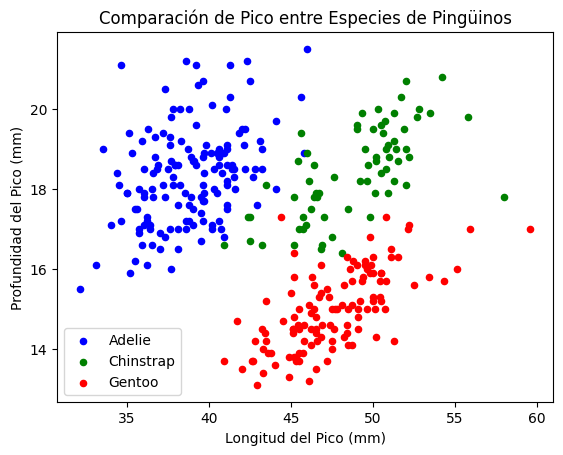

In [5]:
fig = df_pen[df_pen.species == 'Adelie'].plot(kind='scatter',
          x='bill_length_mm', y='bill_depth_mm', color='blue', label='Adelie')
df_pen[df_pen.species == 'Chinstrap'].plot(kind='scatter',
    x='bill_length_mm', y='bill_depth_mm', color='green', label='Chinstrap', ax=fig)
df_pen[df_pen.species == 'Gentoo'].plot(kind='scatter',
    x='bill_length_mm', y='bill_depth_mm', color='red', label='Gentoo', ax=fig)

fig.set_xlabel('Longitud del Pico (mm)')
fig.set_ylabel('Profundidad del Pico (mm)')
fig.set_title('Comparación de Pico entre Especies de Pingüinos')
plt.show()

### KNN

In [6]:
X = np.array(df_pen.drop(['species'], axis=1))
y = np.array(df_pen['species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Se toman {} registros para entrenamiento y {} registros para prueba'.format(X_train.shape[0], X_test.shape[0]))

Se toman 233 registros para entrenamiento y 100 registros para prueba


In [7]:
# Modelo KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

# Conjunto de entrenamiento
train_accuracy = KNN.score(X_train, y_train)
print(f'Precisión KNN en entrenamiento: {train_accuracy:.2f}')

# Conjunto de prueba
y_pred = KNN.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión KNN en prueba: {test_accuracy:.2f}')

Precisión KNN en entrenamiento: 0.97
Precisión KNN en prueba: 0.97


([<matplotlib.axis.XTick at 0x2fe2bdcffb0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

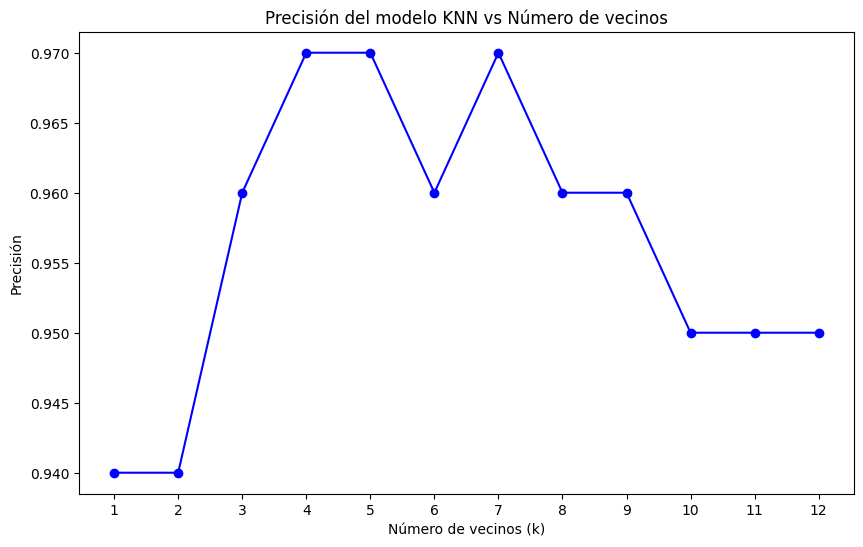

In [8]:
#Precision por Vecinos
neighbors = range(1, 13)
accuracies = []

for k in neighbors:
    algoritmo = KNeighborsClassifier(n_neighbors=k)
    algoritmo.fit(X_train, y_train)
    y_pred = algoritmo.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o', linestyle='-', color='b')
plt.title('Precisión del modelo KNN vs Número de vecinos')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.xticks(neighbors)

Precisión Árboles de Decisión Clasificación en el conjunto de entrenamiento: 1.00
Precisión Árboles de Decisión Clasificación en el conjunto de prueba: 0.95


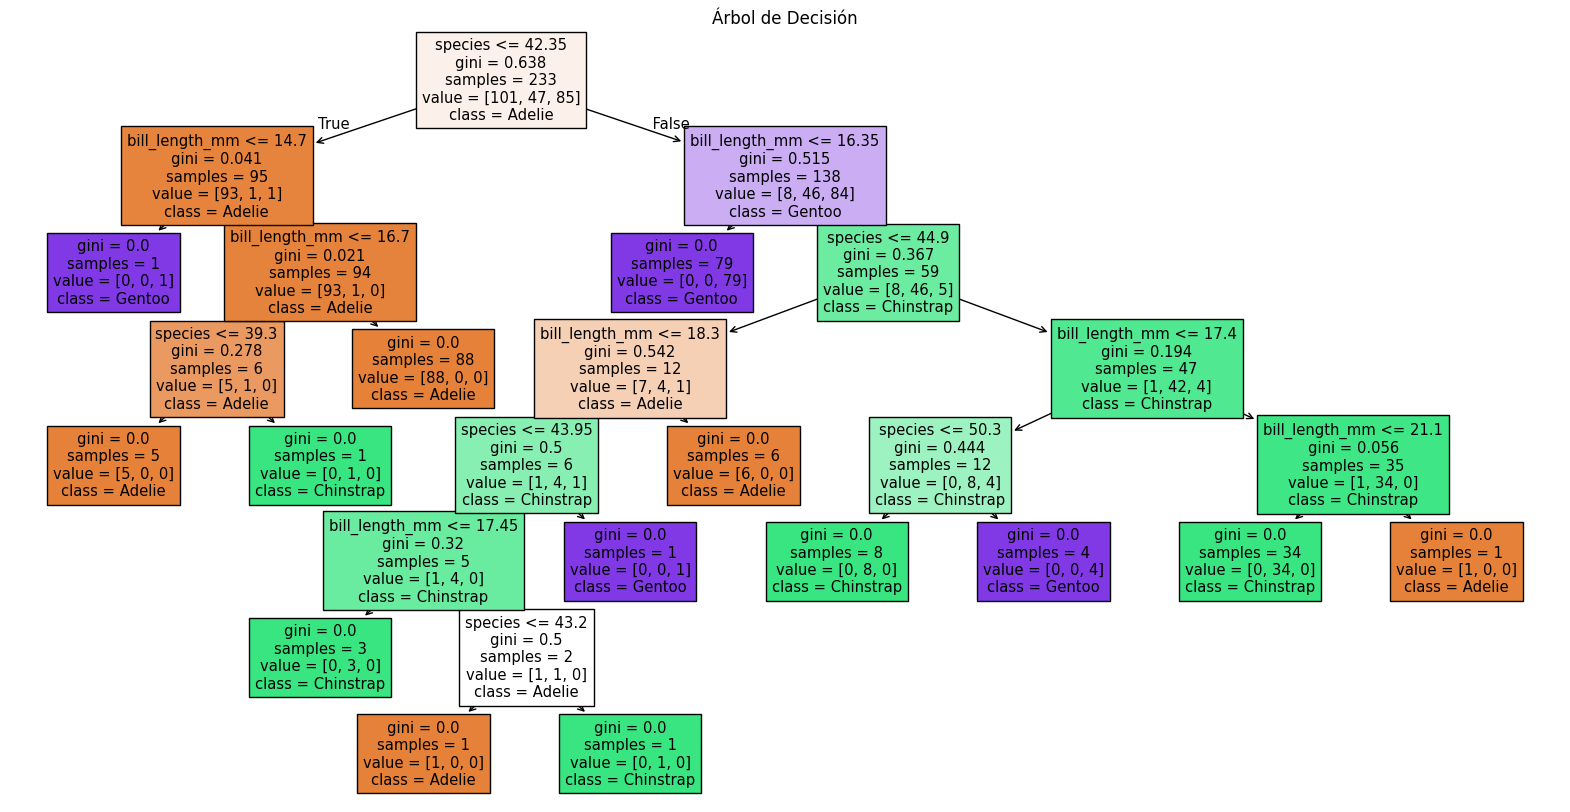

In [9]:
# Árbol de Decisión
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)

# Conjunto de entrenamiento
train_accuracy = algoritmo.score(X_train, y_train)
print(f'Precisión Árboles de Decisión Clasificación en el conjunto de entrenamiento: {train_accuracy:.2f}')

#Conjunto de prueba
test_accuracy = algoritmo.score(X_test, y_test)
print(f'Precisión Árboles de Decisión Clasificación en el conjunto de prueba: {test_accuracy:.2f}')

plt.figure(figsize=(20, 10)) 
plot_tree(algoritmo, filled=True, feature_names=df_pen.columns[:-1], class_names=df_pen['species'].unique())
plt.title('Árbol de Decisión')
plt.show()

Precisión K-Nearest Neighbors en entrenamiento: 0.97
Precisión K-Nearest Neighbors en prueba: 0.97
Precisión Decision Tree en entrenamiento: 1.00
Precisión Decision Tree en prueba: 0.94


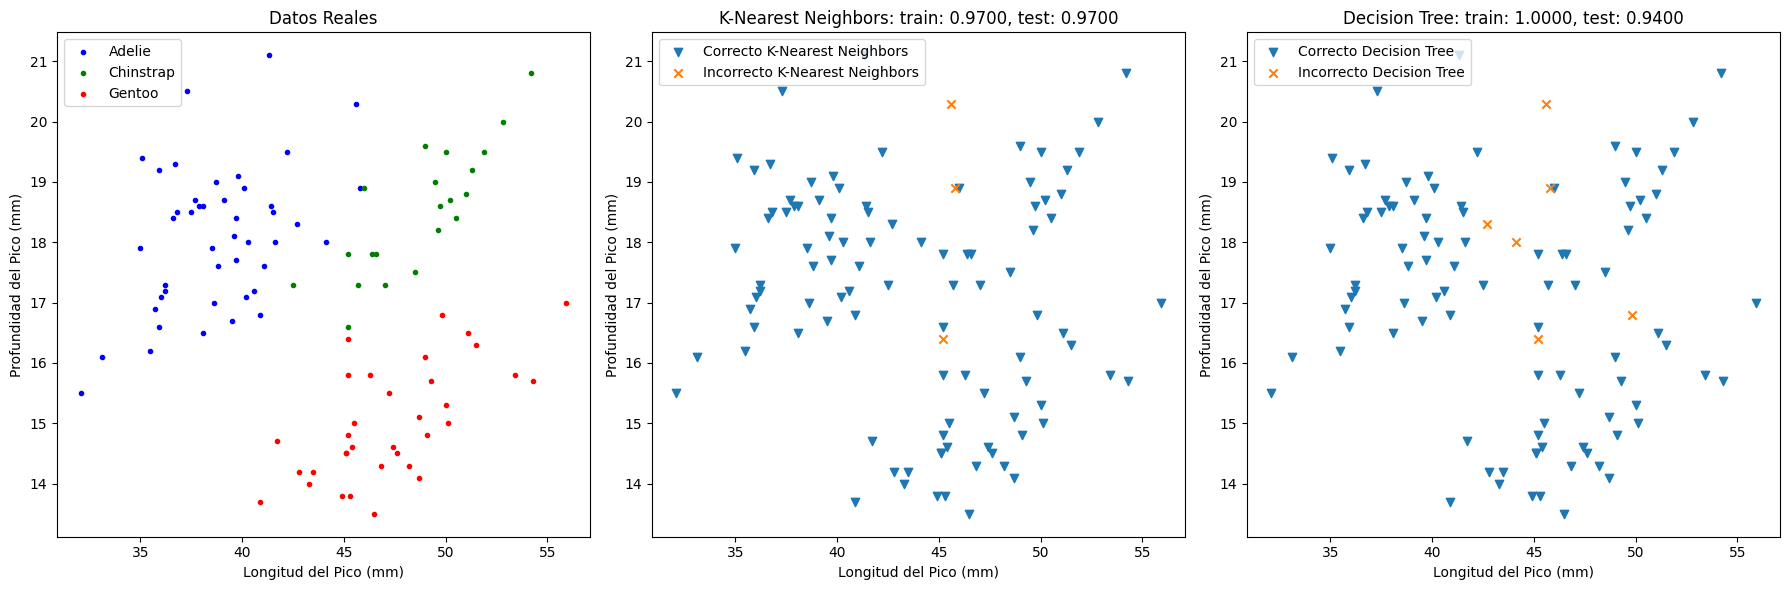

In [10]:

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
classifiers = {
    'K-Nearest Neighbors': KNN,
    'Decision Tree': algoritmo,
}

# Entrenar clasificadores y hacer predicciones
predictions = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    predictions[name] = preds

# Evaluar precisión en el conjunto de entrenamiento y prueba
for name, clf in classifiers.items():
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, predictions[name])
    print(f'Precisión {name} en entrenamiento: {train_accuracy:.2f}')
    print(f'Precisión {name} en prueba: {test_accuracy:.2f}')

colors = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}

fig, axs = plt.subplots(1, len(classifiers) + 1, figsize=(18, 6))

for label, color in colors.items():
    indices = np.where(y_test == label)[0]
    plot_points(axs[0], X_test[indices, 0], X_test[indices, 1],
                scatter_params={'marker': '.', 'c': color, 'label': label})
axs[0].set_title('Datos Reales')
axs[0].set_xlabel('Longitud del Pico (mm)')
axs[0].set_ylabel('Profundidad del Pico (mm)')
axs[0].legend(loc="upper left")


for i, (name, preds) in enumerate(predictions.items(), start=1):
    correct_indices = np.where(preds == y_test)[0]
    incorrect_indices = np.where(preds != y_test)[0]
    
    correct_preds_X = X_test[correct_indices]
    incorrect_preds_X = X_test[incorrect_indices]
    
    plot_points(axs[i], correct_preds_X[:, 0], correct_preds_X[:, 1],
                scatter_params={'marker': 'v', 'c': 'C0', 'label': f'Correcto {name}'})
    plot_points(axs[i], incorrect_preds_X[:, 0], incorrect_preds_X[:, 1],
                scatter_params={'marker': 'x', 'c': 'C1', 'label': f'Incorrecto {name}'})
    
    score_train = accuracy_score(y_train, classifiers[name].predict(X_train))
    score_test = accuracy_score(y_test, predictions[name])
    
    axs[i].set_title(f'{name}: train: {score_train:.4f}, test: {score_test:.4f}')
    axs[i].set_xlabel('Longitud del Pico (mm)')
    axs[i].set_ylabel('Profundidad del Pico (mm)')
    axs[i].legend(loc="upper left")

plt.tight_layout()
plt.show()